In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

CONVERGED = False
NUM_SIMS = 3
YEAR = 365 * 24 * 60 * 60
USE_SIMULATED_TIME = False

if USE_SIMULATED_TIME:
    X_LABEL = "Simulated time, years"
else:
    X_LABEL = "Time step number"


data = {
    # "CPR and Schur only": load_data('../1/thermal_dynamic', n_newest=NUM_SIMS),
    "Many solvers": load_data("thermal_many_solvers", n_newest=NUM_SIMS),
    "Many solvers gp": load_data("thermal_many_solvers_gp", n_newest=NUM_SIMS),
}

save_media_path = Path("media")
save_media_path.mkdir(exist_ok=True)

Loading data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_3.npy
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_4.npy
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_5.npy


/home/firedrake/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Loading data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_2.npy
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_3.npy
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy


Many solvers 456.8535300890605 16.08490824699402
Many solvers gp 231.39363813400269 36.85675549507141


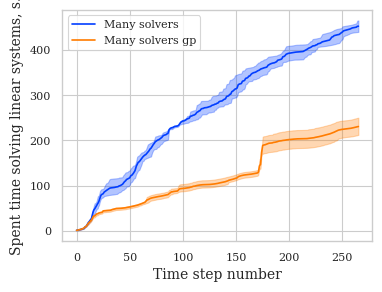

In [2]:
color_iter = -1
best_time = float("inf")
plt.figure(figsize=(4, 3))
for name, values in data.items():
    result = []
    times = []
    color_iter += 1

    for perf in values:
        vals = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )
        result.append(vals)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / YEAR)
        else:
            times.append(np.arange(len(vals)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, result):
        total.append(result[-1])
        t_end.append(time[-1])
        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    if mean[-1] < best_time:
        best_time = mean[-1]
        best = mean
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    if USE_SIMULATED_TIME:
        assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Many solvers


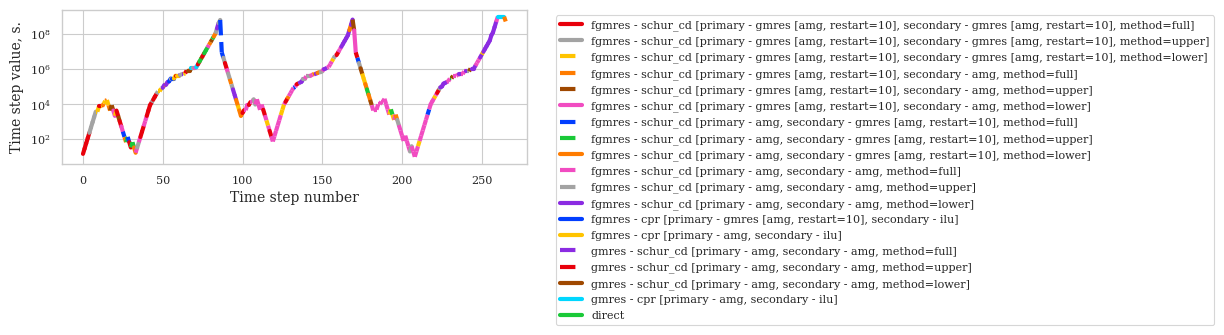

0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
2 direct
3 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
4 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
5 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
6 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
7 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
8 fgmres - cpr [primary - amg, secondary - ilu]
9 gmres - cpr [primary - amg, secondary - ilu]
10 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
11 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
12 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
13 gmres - schur_cd [primary - amg, secondary 

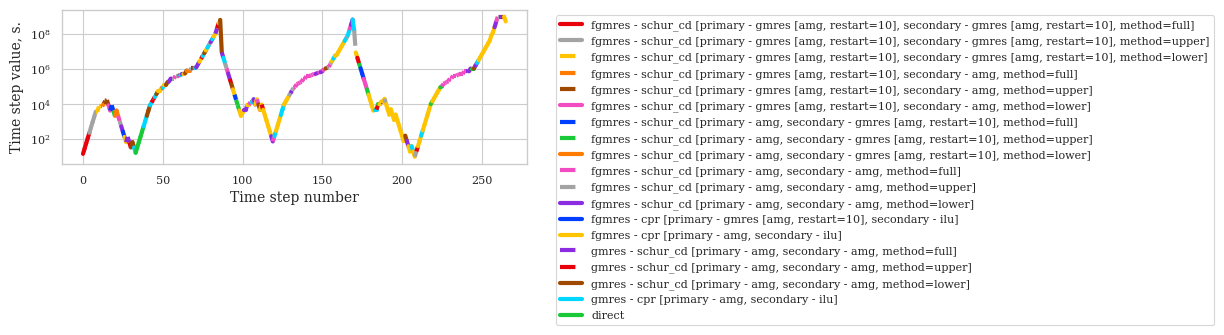

0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
2 direct
3 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
4 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
5 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
6 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
7 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
8 fgmres - cpr [primary - amg, secondary - ilu]
9 gmres - cpr [primary - amg, secondary - ilu]
10 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
11 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
12 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
13 gmres - schur_cd [primary - amg, secondary 

In [3]:
def make_solver_colors(data: Sequence[SolverSelectionData]):
    def make_hashable(x: SolverSelectionData):
        return tuple(x.prediction.decision.subsolvers.items())

    from thermal_solvers import make_thermal_solver_space

    solver_space = make_thermal_solver_space("full")
    all_solvers = solver_space.get_all_solvers()

    subsolvers = list({make_hashable(x) for x in data})
    subsolvers_to_number = {subsolver: i for i, subsolver in enumerate(subsolvers)}

    solver_names = dict()
    for subsolvers, i in subsolvers_to_number.items():
        config = None
        tested = list(dict(subsolvers).values())
        for solver_template in all_solvers:
            expected = list(solver_template.subsolvers.values())
            if tested == expected:
                config = solver_space.config_from_decision(
                    solver_template.use_defaults(), optimized_only=True
                )
                break
        assert config is not None
        solver_names[i] = solver_space.format_config(config)

    return [subsolvers_to_number[make_hashable(entry)] for entry in data], solver_names


def color_solvers(x, values, colors, names):
    lw = 3
    if not USE_SIMULATED_TIME:
        x = np.arange(values.size)

    names = names.copy()
    for i in range(len(x)):
        x_ = x[i : i + 2]
        val = values[i : i + 2]
        color = colors[i]
        args = {}
        if color in names:
            name = names.pop(color)
            # name = color
            args["label"] = name
        if color > 9:
            args["linestyle"] = "--"
        plt.plot(x_, val, linewidth=lw, c=f"C{color}", **args)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


for name, vals in data.items():
    colors_list = []
    time_step_list = []
    inlet_rate_list = []
    sim_time_list = []
    for perf in vals:
        solver_colors, solver_names = make_solver_colors(perf)
        colors_list.append(solver_colors)
        time_step_list.append(make_time_step(perf, converged=CONVERGED))
        inlet_rate_list.append(make_inlet_rate(perf, converged=CONVERGED))
        sim_time_list.append(make_simulation_time(perf, converged=CONVERGED))

    print(name)
    # plt.figure(figsize=(6, 2))
    # color_solvers(sim_time_list[0], inlet_rate_list[0], colors_list[0], solver_names)
    # plt.ylabel("Source rate, $m^3 s^{-1}$.")
    # plt.xlabel(X_LABEL)
    # plt.yscale("log")
    # if save_media_path is not None:
    #     plt.savefig(save_media_path / f"thermal_source_{name}.pdf", bbox_inches="tight")
    # plt.show()

    plt.figure(figsize=(6, 2))
    plt.ylabel("Time step value, s.")
    plt.xlabel(X_LABEL)
    color_solvers(sim_time_list[0], time_step_list[0], colors_list[0], solver_names)
    plt.yscale("log")
    if save_media_path is not None:
        plt.savefig(save_media_path / f"thermal_dt_{name}.pdf", bbox_inches="tight")
    plt.show()
    for i, name in solver_names.items():
        print(i, name)

Can we choose 2-3 best solvers from the bigger list of solvers?
evaluate cumulative performance prediction of pairs (or n solvers) after the simulation. 

Important thing the paper provides: the methology.
The amount of exploration is fixed for one solver. If we have more solvers, we need more exploration.

In [4]:
from tqdm import tqdm
import itertools
from solver_selector.solver_selector import make_solver_selector
from thermal_solvers import make_thermal_solver_space

from thermal_solvers import DirectSolverNode, ForkNode


solver_space = make_thermal_solver_space("full")
# solver_space = ForkNode([DirectSolverNode(), DirectSolverNode(name='direct1')])
all_solvers = solver_space.get_all_solvers()
combinations_scores = {}
for comb in tqdm(list(itertools.combinations(range(len(all_solvers)), 2))):
    # if comb != (6, 8):
    #     continue
    print(comb)
    solvers_to_use = all_solvers[comb[0]], all_solvers[comb[1]]
    solver_selector = make_solver_selector(
        solver_space,
        params={
            "exploration": 0,
            "load_statistics_paths": get_newest_data_paths(
                "thermal_many_solvers_gp", n_newest=1
            ),
        },
        solver_templates=solvers_to_use,
    )
    for performance_predictor in solver_selector.predictors:
        assert performance_predictor.is_initialized
    scores = []
    for entry in data["Many solvers gp"][0]:
        solver = solver_selector.select_solver(entry.prediction.context)
        for performance_predictor in solver_selector.predictors:
            assert performance_predictor.is_initialized
        expected_score = solver.score
        scores.append(expected_score)
    combinations_scores[comb] = scores

  0%|          | 0/171 [00:00<?, ?it/s]

(0, 1)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 9 / 266 data points.


  1%|          | 1/171 [00:00<01:25,  1.98it/s]

(0, 2)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


  1%|          | 2/171 [00:01<01:25,  1.97it/s]

(0, 3)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


  2%|▏         | 3/171 [00:01<01:18,  2.15it/s]

(0, 4)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


  2%|▏         | 4/171 [00:01<01:14,  2.25it/s]

(0, 5)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


  3%|▎         | 5/171 [00:02<01:11,  2.33it/s]

(0, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


  4%|▎         | 6/171 [00:02<01:08,  2.41it/s]

(0, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 12 / 266 data points.


  4%|▍         | 7/171 [00:03<01:15,  2.18it/s]

(0, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


  5%|▍         | 8/171 [00:03<01:11,  2.29it/s]

(0, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


  5%|▌         | 9/171 [00:03<01:08,  2.37it/s]

(0, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 21 / 266 data points.


  6%|▌         | 10/171 [00:04<01:06,  2.41it/s]

(0, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 47 / 266 data points.


  6%|▋         | 11/171 [00:04<01:06,  2.41it/s]

(0, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


  7%|▋         | 12/171 [00:05<01:04,  2.47it/s]

(0, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 57 / 266 data points.


  8%|▊         | 13/171 [00:05<01:04,  2.47it/s]

(0, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 17 / 266 data points.


  8%|▊         | 14/171 [00:05<01:02,  2.52it/s]

(0, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 22 / 266 data points.


  9%|▉         | 15/171 [00:06<01:01,  2.55it/s]

(0, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 25 / 266 data points.


  9%|▉         | 16/171 [00:06<01:00,  2.56it/s]

(0, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 32 / 266 data points.


 10%|▉         | 17/171 [00:07<01:00,  2.57it/s]

(0, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 11%|█         | 18/171 [00:07<01:05,  2.33it/s]

(1, 2)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 11%|█         | 19/171 [00:08<01:05,  2.34it/s]

(1, 3)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 12%|█▏        | 20/171 [00:08<01:02,  2.41it/s]

(1, 4)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 12%|█▏        | 21/171 [00:08<01:00,  2.46it/s]

(1, 5)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 13%|█▎        | 22/171 [00:09<00:59,  2.50it/s]

(1, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 13%|█▎        | 23/171 [00:09<00:58,  2.51it/s]

(1, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 11 / 266 data points.


 14%|█▍        | 24/171 [00:09<00:58,  2.52it/s]

(1, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 15%|█▍        | 25/171 [00:10<00:57,  2.53it/s]

(1, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 44 / 266 data points.


 15%|█▌        | 26/171 [00:10<00:57,  2.50it/s]

(1, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 16%|█▌        | 27/171 [00:11<00:56,  2.54it/s]

(1, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 46 / 266 data points.


 16%|█▋        | 28/171 [00:11<00:56,  2.53it/s]

(1, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 17%|█▋        | 29/171 [00:11<00:55,  2.54it/s]

(1, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 56 / 266 data points.


 18%|█▊        | 30/171 [00:12<00:55,  2.53it/s]

(1, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 16 / 266 data points.


 18%|█▊        | 31/171 [00:12<01:00,  2.30it/s]

(1, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 21 / 266 data points.


 19%|█▊        | 32/171 [00:13<00:58,  2.39it/s]

(1, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 24 / 266 data points.


 19%|█▉        | 33/171 [00:13<00:56,  2.45it/s]

(1, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 31 / 266 data points.


 20%|█▉        | 34/171 [00:14<00:54,  2.50it/s]

(1, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 9 / 266 data points.


 20%|██        | 35/171 [00:14<00:53,  2.53it/s]

(2, 3)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 21%|██        | 36/171 [00:14<00:53,  2.54it/s]

(2, 4)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 22%|██▏       | 37/171 [00:15<00:52,  2.55it/s]

(2, 5)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 22%|██▏       | 38/171 [00:15<00:51,  2.56it/s]

(2, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 23%|██▎       | 39/171 [00:15<00:51,  2.59it/s]

(2, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 23%|██▎       | 40/171 [00:16<00:50,  2.60it/s]

(2, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 24%|██▍       | 41/171 [00:16<00:49,  2.62it/s]

(2, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 25%|██▍       | 42/171 [00:17<00:49,  2.62it/s]

(2, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 25%|██▌       | 43/171 [00:17<00:54,  2.37it/s]

(2, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 26%|██▌       | 44/171 [00:17<00:52,  2.44it/s]

(2, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 26%|██▋       | 45/171 [00:18<00:50,  2.51it/s]

(2, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 55 / 266 data points.


 27%|██▋       | 46/171 [00:18<00:49,  2.53it/s]

(2, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 15 / 266 data points.


 27%|██▋       | 47/171 [00:19<00:47,  2.59it/s]

(2, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 28%|██▊       | 48/171 [00:19<00:46,  2.62it/s]

(2, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 29%|██▊       | 49/171 [00:19<00:46,  2.60it/s]

(2, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 30 / 266 data points.


 29%|██▉       | 50/171 [00:20<00:46,  2.62it/s]

(2, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


 30%|██▉       | 51/171 [00:20<00:45,  2.65it/s]

(3, 4)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 30%|███       | 52/171 [00:20<00:42,  2.82it/s]

(3, 5)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 4 / 266 data points.


 31%|███       | 53/171 [00:21<00:40,  2.89it/s]

(3, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 32%|███▏      | 54/171 [00:21<00:38,  3.00it/s]

(3, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 9 / 266 data points.


 32%|███▏      | 55/171 [00:21<00:38,  3.03it/s]

(3, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 33%|███▎      | 56/171 [00:22<00:41,  2.75it/s]

(3, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 42 / 266 data points.


 33%|███▎      | 57/171 [00:22<00:40,  2.81it/s]

(3, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 18 / 266 data points.


 34%|███▍      | 58/171 [00:22<00:38,  2.95it/s]

(3, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 44 / 266 data points.


 35%|███▍      | 59/171 [00:23<00:37,  2.99it/s]

(3, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 35%|███▌      | 60/171 [00:23<00:36,  3.04it/s]

(3, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 54 / 266 data points.


 36%|███▌      | 61/171 [00:23<00:36,  3.00it/s]

(3, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 14 / 266 data points.


 36%|███▋      | 62/171 [00:24<00:35,  3.06it/s]

(3, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 37%|███▋      | 63/171 [00:24<00:34,  3.12it/s]

(3, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 22 / 266 data points.


 37%|███▋      | 64/171 [00:24<00:34,  3.10it/s]

(3, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 29 / 266 data points.


 38%|███▊      | 65/171 [00:25<00:34,  3.08it/s]

(3, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 39%|███▊      | 66/171 [00:25<00:33,  3.17it/s]

(4, 5)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 39%|███▉      | 67/171 [00:25<00:32,  3.18it/s]

(4, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 40%|███▉      | 68/171 [00:26<00:32,  3.19it/s]

(4, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 40%|████      | 69/171 [00:26<00:36,  2.76it/s]

(4, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 41%|████      | 70/171 [00:26<00:36,  2.76it/s]

(4, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 42%|████▏     | 71/171 [00:27<00:35,  2.80it/s]

(4, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 42%|████▏     | 72/171 [00:27<00:35,  2.81it/s]

(4, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 43%|████▎     | 73/171 [00:28<00:35,  2.78it/s]

(4, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 43%|████▎     | 74/171 [00:28<00:34,  2.82it/s]

(4, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 55 / 266 data points.


 44%|████▍     | 75/171 [00:28<00:33,  2.85it/s]

(4, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 15 / 266 data points.


 44%|████▍     | 76/171 [00:29<00:31,  2.98it/s]

(4, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 45%|████▌     | 77/171 [00:29<00:30,  3.04it/s]

(4, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 46%|████▌     | 78/171 [00:29<00:29,  3.11it/s]

(4, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 30 / 266 data points.


 46%|████▌     | 79/171 [00:29<00:29,  3.16it/s]

(4, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


 47%|████▋     | 80/171 [00:30<00:28,  3.23it/s]

(5, 6)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 47%|████▋     | 81/171 [00:30<00:27,  3.24it/s]

(5, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 9 / 266 data points.


 48%|████▊     | 82/171 [00:30<00:31,  2.84it/s]

(5, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 49%|████▊     | 83/171 [00:31<00:30,  2.90it/s]

(5, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 42 / 266 data points.


 49%|████▉     | 84/171 [00:31<00:29,  2.92it/s]

(5, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 18 / 266 data points.


 50%|████▉     | 85/171 [00:31<00:28,  2.97it/s]

(5, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 44 / 266 data points.


 50%|█████     | 86/171 [00:32<00:28,  2.96it/s]

(5, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 5 / 266 data points.


 51%|█████     | 87/171 [00:32<00:28,  2.99it/s]

(5, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 54 / 266 data points.


 51%|█████▏    | 88/171 [00:32<00:27,  2.98it/s]

(5, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 14 / 266 data points.


 52%|█████▏    | 89/171 [00:33<00:26,  3.06it/s]

(5, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 53%|█████▎    | 90/171 [00:33<00:26,  3.05it/s]

(5, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 22 / 266 data points.


 53%|█████▎    | 91/171 [00:33<00:27,  2.95it/s]

(5, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 29 / 266 data points.


 54%|█████▍    | 92/171 [00:34<00:26,  2.98it/s]

(5, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 7 / 266 data points.


 54%|█████▍    | 93/171 [00:34<00:25,  3.07it/s]

(6, 7)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 55%|█████▍    | 94/171 [00:35<00:28,  2.69it/s]

(6, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 56%|█████▌    | 95/171 [00:35<00:26,  2.84it/s]

(6, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 56%|█████▌    | 96/171 [00:35<00:25,  2.92it/s]

(6, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 57%|█████▋    | 97/171 [00:36<00:25,  2.96it/s]

(6, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 57%|█████▋    | 98/171 [00:36<00:24,  2.96it/s]

(6, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 58%|█████▊    | 99/171 [00:36<00:24,  2.98it/s]

(6, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 55 / 266 data points.


 58%|█████▊    | 100/171 [00:37<00:23,  3.00it/s]

(6, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 15 / 266 data points.


 59%|█████▉    | 101/171 [00:37<00:23,  3.04it/s]

(6, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 60%|█████▉    | 102/171 [00:37<00:22,  3.05it/s]

(6, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 60%|██████    | 103/171 [00:38<00:22,  3.05it/s]

(6, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 30 / 266 data points.


 61%|██████    | 104/171 [00:38<00:22,  3.02it/s]

(6, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


 61%|██████▏   | 105/171 [00:38<00:21,  3.05it/s]

(7, 8)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 62%|██████▏   | 106/171 [00:39<00:21,  3.04it/s]

(7, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 47 / 266 data points.


 63%|██████▎   | 107/171 [00:39<00:25,  2.56it/s]

(7, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 63%|██████▎   | 108/171 [00:39<00:23,  2.72it/s]

(7, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 49 / 266 data points.


 64%|██████▎   | 109/171 [00:40<00:22,  2.78it/s]

(7, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 10 / 266 data points.


 64%|██████▍   | 110/171 [00:40<00:21,  2.84it/s]

(7, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 59 / 266 data points.


 65%|██████▍   | 111/171 [00:40<00:21,  2.85it/s]

(7, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 65%|██████▌   | 112/171 [00:41<00:20,  2.93it/s]

(7, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 24 / 266 data points.


 66%|██████▌   | 113/171 [00:41<00:19,  2.95it/s]

(7, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 27 / 266 data points.


 67%|██████▋   | 114/171 [00:41<00:19,  2.97it/s]

(7, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 34 / 266 data points.


 67%|██████▋   | 115/171 [00:42<00:18,  2.98it/s]

(7, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 12 / 266 data points.


 68%|██████▊   | 116/171 [00:42<00:18,  3.01it/s]

(8, 9)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 68%|██████▊   | 117/171 [00:42<00:18,  3.00it/s]

(8, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 69%|██████▉   | 118/171 [00:43<00:17,  3.02it/s]

(8, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 70%|██████▉   | 119/171 [00:43<00:19,  2.68it/s]

(8, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 6 / 266 data points.


 70%|███████   | 120/171 [00:43<00:18,  2.77it/s]

(8, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 55 / 266 data points.


 71%|███████   | 121/171 [00:44<00:17,  2.80it/s]

(8, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 15 / 266 data points.


 71%|███████▏  | 122/171 [00:44<00:17,  2.80it/s]

(8, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 72%|███████▏  | 123/171 [00:45<00:16,  2.91it/s]

(8, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 73%|███████▎  | 124/171 [00:45<00:16,  2.93it/s]

(8, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 30 / 266 data points.


 73%|███████▎  | 125/171 [00:45<00:15,  2.92it/s]

(8, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


 74%|███████▎  | 126/171 [00:46<00:15,  2.93it/s]

(9, 10)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 56 / 266 data points.


 74%|███████▍  | 127/171 [00:46<00:15,  2.87it/s]

(9, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 82 / 266 data points.


 75%|███████▍  | 128/171 [00:46<00:15,  2.81it/s]

(9, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 75%|███████▌  | 129/171 [00:47<00:14,  2.87it/s]

(9, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 92 / 266 data points.


 76%|███████▌  | 130/171 [00:47<00:14,  2.88it/s]

(9, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 52 / 266 data points.


 77%|███████▋  | 131/171 [00:47<00:15,  2.57it/s]

(9, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 57 / 266 data points.


 77%|███████▋  | 132/171 [00:48<00:14,  2.69it/s]

(9, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 60 / 266 data points.


 78%|███████▊  | 133/171 [00:48<00:13,  2.77it/s]

(9, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 67 / 266 data points.


 78%|███████▊  | 134/171 [00:48<00:13,  2.77it/s]

(9, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 79%|███████▉  | 135/171 [00:49<00:12,  2.82it/s]

(10, 11)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 58 / 266 data points.


 80%|███████▉  | 136/171 [00:49<00:12,  2.88it/s]

(10, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 19 / 266 data points.


 80%|████████  | 137/171 [00:49<00:11,  2.90it/s]

(10, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 68 / 266 data points.


 81%|████████  | 138/171 [00:50<00:11,  2.87it/s]

(10, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 28 / 266 data points.


 81%|████████▏ | 139/171 [00:50<00:10,  2.93it/s]

(10, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 33 / 266 data points.


 82%|████████▏ | 140/171 [00:50<00:10,  2.99it/s]

(10, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 36 / 266 data points.


 82%|████████▏ | 141/171 [00:51<00:09,  3.02it/s]

(10, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 43 / 266 data points.


 83%|████████▎ | 142/171 [00:51<00:09,  3.03it/s]

(10, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 21 / 266 data points.


 84%|████████▎ | 143/171 [00:52<00:10,  2.72it/s]

(11, 12)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 45 / 266 data points.


 84%|████████▍ | 144/171 [00:52<00:09,  2.78it/s]

(11, 13)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 94 / 266 data points.


 85%|████████▍ | 145/171 [00:52<00:09,  2.80it/s]

(11, 14)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 54 / 266 data points.


 85%|████████▌ | 146/171 [00:53<00:08,  2.87it/s]

(11, 15)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 59 / 266 data points.


 86%|████████▌ | 147/171 [00:53<00:08,  2.92it/s]

(11, 16)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 62 / 266 data points.


 87%|████████▋ | 148/171 [00:53<00:07,  2.94it/s]

(11, 17)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 69 / 266 data points.


 87%|████████▋ | 149/171 [00:54<00:07,  2.95it/s]

(11, 18)
Selecting from 2 solvers.
0 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 47 / 266 data points.


 88%|████████▊ | 150/171 [00:54<00:07,  2.96it/s]

(12, 13)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 fgmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 55 / 266 data points.


 88%|████████▊ | 151/171 [00:54<00:06,  2.88it/s]

(12, 14)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 15 / 266 data points.


 89%|████████▉ | 152/171 [00:55<00:06,  2.87it/s]

(12, 15)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 20 / 266 data points.


 89%|████████▉ | 153/171 [00:55<00:06,  2.88it/s]

(12, 16)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 23 / 266 data points.


 90%|█████████ | 154/171 [00:55<00:05,  2.87it/s]

(12, 17)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 30 / 266 data points.


 91%|█████████ | 155/171 [00:56<00:05,  2.87it/s]

(12, 18)
Selecting from 2 solvers.
0 fgmres - cpr [primary - gmres [amg, restart=10], secondary - ilu]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 8 / 266 data points.


 91%|█████████ | 156/171 [00:56<00:05,  2.58it/s]

(13, 14)
Selecting from 2 solvers.
0 fgmres - cpr [primary - amg, secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=full]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 64 / 266 data points.


 92%|█████████▏| 157/171 [00:56<00:05,  2.70it/s]

(13, 15)
Selecting from 2 solvers.
0 fgmres - cpr [primary - amg, secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 69 / 266 data points.


 92%|█████████▏| 158/171 [00:57<00:04,  2.79it/s]

(13, 16)
Selecting from 2 solvers.
0 fgmres - cpr [primary - amg, secondary - ilu]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 72 / 266 data points.


 93%|█████████▎| 159/171 [00:57<00:04,  2.85it/s]

(13, 17)
Selecting from 2 solvers.
0 fgmres - cpr [primary - amg, secondary - ilu]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 79 / 266 data points.


 94%|█████████▎| 160/171 [00:57<00:03,  2.89it/s]

(13, 18)
Selecting from 2 solvers.
0 fgmres - cpr [primary - amg, secondary - ilu]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 57 / 266 data points.


 94%|█████████▍| 161/171 [00:58<00:03,  2.89it/s]

(14, 15)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 29 / 266 data points.


 95%|█████████▍| 162/171 [00:58<00:03,  2.96it/s]

(14, 16)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 32 / 266 data points.


 95%|█████████▌| 163/171 [00:58<00:02,  3.03it/s]

(14, 17)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=full]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 39 / 266 data points.


 96%|█████████▌| 164/171 [00:59<00:02,  3.06it/s]

(14, 18)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=full]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 17 / 266 data points.


 96%|█████████▋| 165/171 [00:59<00:01,  3.13it/s]

(15, 16)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 37 / 266 data points.


 97%|█████████▋| 166/171 [00:59<00:01,  3.14it/s]

(15, 17)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 44 / 266 data points.


 98%|█████████▊| 167/171 [01:00<00:01,  2.78it/s]

(15, 18)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 22 / 266 data points.


 98%|█████████▊| 168/171 [01:00<00:01,  2.87it/s]

(16, 17)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 gmres - cpr [primary - amg, secondary - ilu]
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 47 / 266 data points.


 99%|█████████▉| 169/171 [01:01<00:00,  2.94it/s]

(16, 18)
Selecting from 2 solvers.
0 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 25 / 266 data points.


 99%|█████████▉| 170/171 [01:01<00:00,  3.03it/s]

(17, 18)
Selecting from 2 solvers.
0 gmres - cpr [primary - amg, secondary - ilu]
1 direct
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Using epsilon-greedy exploration
Using regressor: gradient_boosting
Warm start using data:
/home/firedrake/solver_selector/examples/4/performance/thermal_many_solvers_gp_4.npy
Used 32 / 266 data points.


100%|██████████| 171/171 [01:01<00:00,  2.77it/s]


Best pairs of solvers:
0
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
fgmres - cpr [primary - amg, secondary - ilu]

1
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
gmres - schur_cd [primary - amg, secondary - amg, method=full]

2
fgmres - cpr [primary - amg, secondary - ilu]
gmres - schur_cd [primary - amg, secondary - amg, method=full]

3
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
gmres - cpr [primary - amg, secondary - ilu]

4
fgmres - cpr [primary - amg, secondary - ilu]
direct



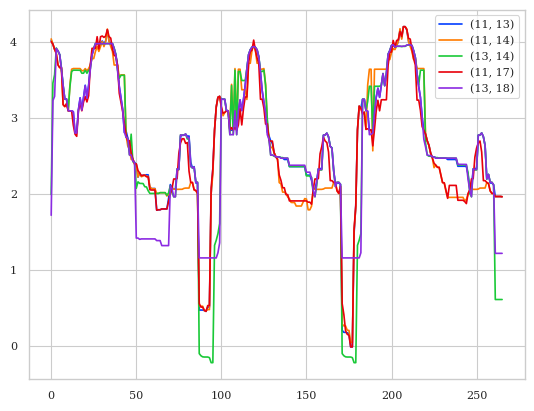

In [5]:
comb_total = {comb: sum(score) for comb, score in combinations_scores.items()}
n_best = sorted(comb_total, key=comb_total.get, reverse=True)[:5]

print("Best pairs of solvers:")
for i, comb in enumerate(n_best):
    plt.plot(combinations_scores[comb], label=comb)

    print(i)
    for id in comb:
        default = all_solvers[id].use_defaults()
        conf = solver_space.config_from_decision(decision=default, optimized_only=True)
        print(solver_space.format_config(conf))
    print()
plt.legend()

In [6]:
from tqdm import tqdm
import itertools
from solver_selector.solver_selector import make_solver_selector
from thermal_solvers import make_thermal_solver_space

from thermal_solvers import DirectSolverNode, ForkNode


solver_space = make_thermal_solver_space("full")
# solver_space = ForkNode([DirectSolverNode(), DirectSolverNode(name='direct1')])
all_solvers = solver_space.get_all_solvers()

solver_selector = make_solver_selector(
    solver_space,
    params={
        "exploration": 0,
        "load_statistics_paths": get_newest_data_paths(
            "thermal_many_solvers_gp", n_newest=1
        ),
    },
)

solver_scores = {}

for i, performance_predictor in enumerate(solver_selector.predictors):
    print(i)
    assert performance_predictor.is_initialized
    scores = []
    for entry in data["Many solvers gp"][0]:
        solver = performance_predictor.select_solver_parameters(
            entry.prediction.context
        )
        scores.append(solver.score)
    solver_scores[i] = np.array(scores)

new_combinations_scores = {}

for comb in itertools.combinations(range(len(all_solvers)), 2):
    s0_scores = solver_scores[comb[0]]
    s1_scores = solver_scores[comb[1]]
    new_combinations_scores[comb] = np.maximum(s0_scores, s1_scores)

Selecting from 19 solvers.
0 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=full]
1 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
2 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=lower]
3 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=full]
4 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=upper]
5 fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - amg, method=lower]
6 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]
7 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
8 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=lower]
9 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
10 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]

Best pairs of solvers:
0
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
fgmres - cpr [primary - amg, secondary - ilu]

1
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
gmres - schur_cd [primary - amg, secondary - amg, method=full]

2
fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
gmres - cpr [primary - amg, secondary - ilu]

3
fgmres - cpr [primary - amg, secondary - ilu]
gmres - schur_cd [primary - amg, secondary - amg, method=full]

4
fgmres - schur_cd [primary - gmres [amg, restart=10], secondary - gmres [amg, restart=10], method=upper]
fgmres - cpr [primary - amg, secondary - ilu]



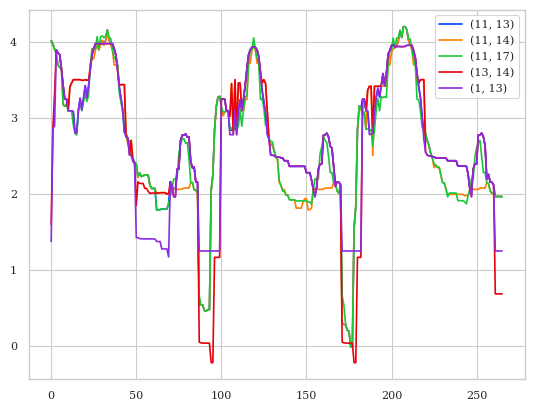

In [7]:
comb_total = {comb: sum(score) for comb, score in new_combinations_scores.items()}
n_best = sorted(comb_total, key=comb_total.get, reverse=True)[:5]

print("Best pairs of solvers:")
for i, comb in enumerate(n_best):
    plt.plot(new_combinations_scores[comb], label=comb)

    print(i)
    for id in comb:
        default = all_solvers[id].use_defaults()
        conf = solver_space.config_from_decision(decision=default, optimized_only=True)
        print(solver_space.format_config(conf))
    print()
plt.legend()

In [8]:
from data_scripts import make_num_linear_iters

solver_total = {solv: sum(score) for solv, score in solver_scores.items()}
n_best = sorted(solver_total, key=solver_total.get, reverse=True)[:10]

d = solver_selector._sort_decisions_for_predictors(data['Many solvers gp'][0])

for i in n_best:
    default = all_solvers[i].use_defaults()
    conf = solver_space.config_from_decision(decision=default, optimized_only=True)
    print(i, len(make_num_linear_iters(d[i], converged=CONVERGED)), solver_space.format_config(conf))

11 113 fgmres - schur_cd [primary - amg, secondary - amg, method=lower]
17 111 gmres - cpr [primary - amg, secondary - ilu]
16 93 gmres - schur_cd [primary - amg, secondary - amg, method=lower]
14 62 gmres - schur_cd [primary - amg, secondary - amg, method=full]
13 526 fgmres - cpr [primary - amg, secondary - ilu]
9 250 fgmres - schur_cd [primary - amg, secondary - amg, method=full]
10 91 fgmres - schur_cd [primary - amg, secondary - amg, method=upper]
15 73 gmres - schur_cd [primary - amg, secondary - amg, method=upper]
7 48 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=upper]
6 21 fgmres - schur_cd [primary - amg, secondary - gmres [amg, restart=10], method=full]


In [9]:
make_num_linear_iters(d[11], converged=CONVERGED)

array([ 7,  7,  6,  6,  6,  7,  6,  6,  6,  7,  6,  6,  6,  7,  6, 19, 16,
       16, 16, 22, 20, 14, 19, 19, 18, 24, 17, 16, 15, 16, 15, 12, 12,  9,
       20, -1, 11, 10,  9, 10, 10, 10, 15, 12, 10, 13, 11, 13, 11, 13, 11,
       13, 11, 13, 11, 13, 11,  6,  6,  6,  5,  6,  6,  6,  5,  6,  6,  6,
        5,  6,  6,  6, 23, 19, 15, 20, 19, 25, 21, 21, 23, 22, 15, 15, 14,
        6,  6,  6,  5,  6,  6,  6,  5,  6,  6,  6,  5,  6,  6,  6, 26, 23,
       24, 23, 25, 17, 15, 15, 15, 15, 13, 15, 15])

In [10]:
best_solvers_ids = list(set(item for pair in n_best for item in pair))
best_solvers = {i: all_solvers[i] for i in best_solvers_ids}

for i, sol in best_solvers.items():
    default = sol.use_defaults()
    conf = solver_space.config_from_decision(decision=default, optimized_only=True)
    print(i, solver_space.format_config(conf))

TypeError: 'int' object is not iterable

In [ ]:
d = solver_selector._sort_decisions_for_predictors(data['Many solvers gp'][0])[0]
restarts = [x.config['fgmres']['preconditioner']['schur_cd']['primary']['gmres']['restart'] for x in d]
restarts

[28, 18, 11, 5]

In [ ]:
d = solver_selector._sort_decisions_for_predictors(data['Many solvers gp'][0])
[(i, len(x)) for i, x in enumerate(d)]
d[39][0].config

{'gmres': {'preconditioner': {'schur_cd': {'primary': {'none': {'preconditioner': {'amg': {}}}},
    'secondary': {'none': {'preconditioner': {'amg': {}}}},
    'method': 'full'}},
  'tol': 1e-10,
  'restart': 30,
  'maxiter': 10}}